# Descriptive Analysis, Unsupervised Learning – IKEA

 finding and evaluating clusters that contain data with similar properties



In [35]:
import pandas as pd


# read txt file as pandas df
ikea = pd.read_csv("ikea_kommun_data.txt", sep = "\t", encoding = 'latin1', error_bad_lines=False)



/Users/Oksana/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
# display df
ikea.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [37]:
# checking the class
print(type(ikea))

<class 'pandas.core.frame.DataFrame'>


In [38]:
# rows n columns
ikea.shape

(207, 12)

In [39]:
# check data type of all columns
ikea.dtypes

Kommun_code                int64
Year                       int64
Kommun_name               object
Revenue                    int64
Employee                   int64
Population                 int64
Population_University      int64
Percent_University       float64
Productivity             float64
SalesIndex               float64
Infrast                    int64
Border                     int64
dtype: object

# Descriptive Statistical Summary

In [40]:
ikea.describe().T

,count,mean,std,min,25%,50%,75%,max
Kommun_code,207.0,1049.734300,541.065455,114.000000,582.500000,1263.000000,1461.500000,2583.000000
Year,207.0,2010.000000,0.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
Revenue,207.0,1031.801932,2694.889549,11.000000,110.000000,252.000000,825.500000,32897.000000
Employee,207.0,523.038647,1463.194427,2.000000,64.500000,142.000000,435.000000,18795.000000
Population,207.0,34543.396135,66882.499740,3672.000000,10785.500000,16515.000000,37922.000000,847073.000000
Population_University,207.0,4660.106280,14403.495784,174.000000,788.500000,1598.000000,4073.500000,191585.000000
Percent_University,207.0,0.097461,0.040760,0.046142,0.069015,0.086601,0.112085,0.269646
Productivity,207.0,91.454002,27.960867,19.898880,74.700910,90.457050,104.008805,275.636330
SalesIndex,207.0,106.315583,277.678055,1.133426,11.334263,25.965765,85.058489,3389.665819
Infrast,207.0,0.048309,0.214939,0.000000,0.000000,0.000000,0.000000,1.000000


- 'Infra' and 'Border' have values either '0' or '1'. This can be treated as categorical value.
- 'Year' has only data '2010'.

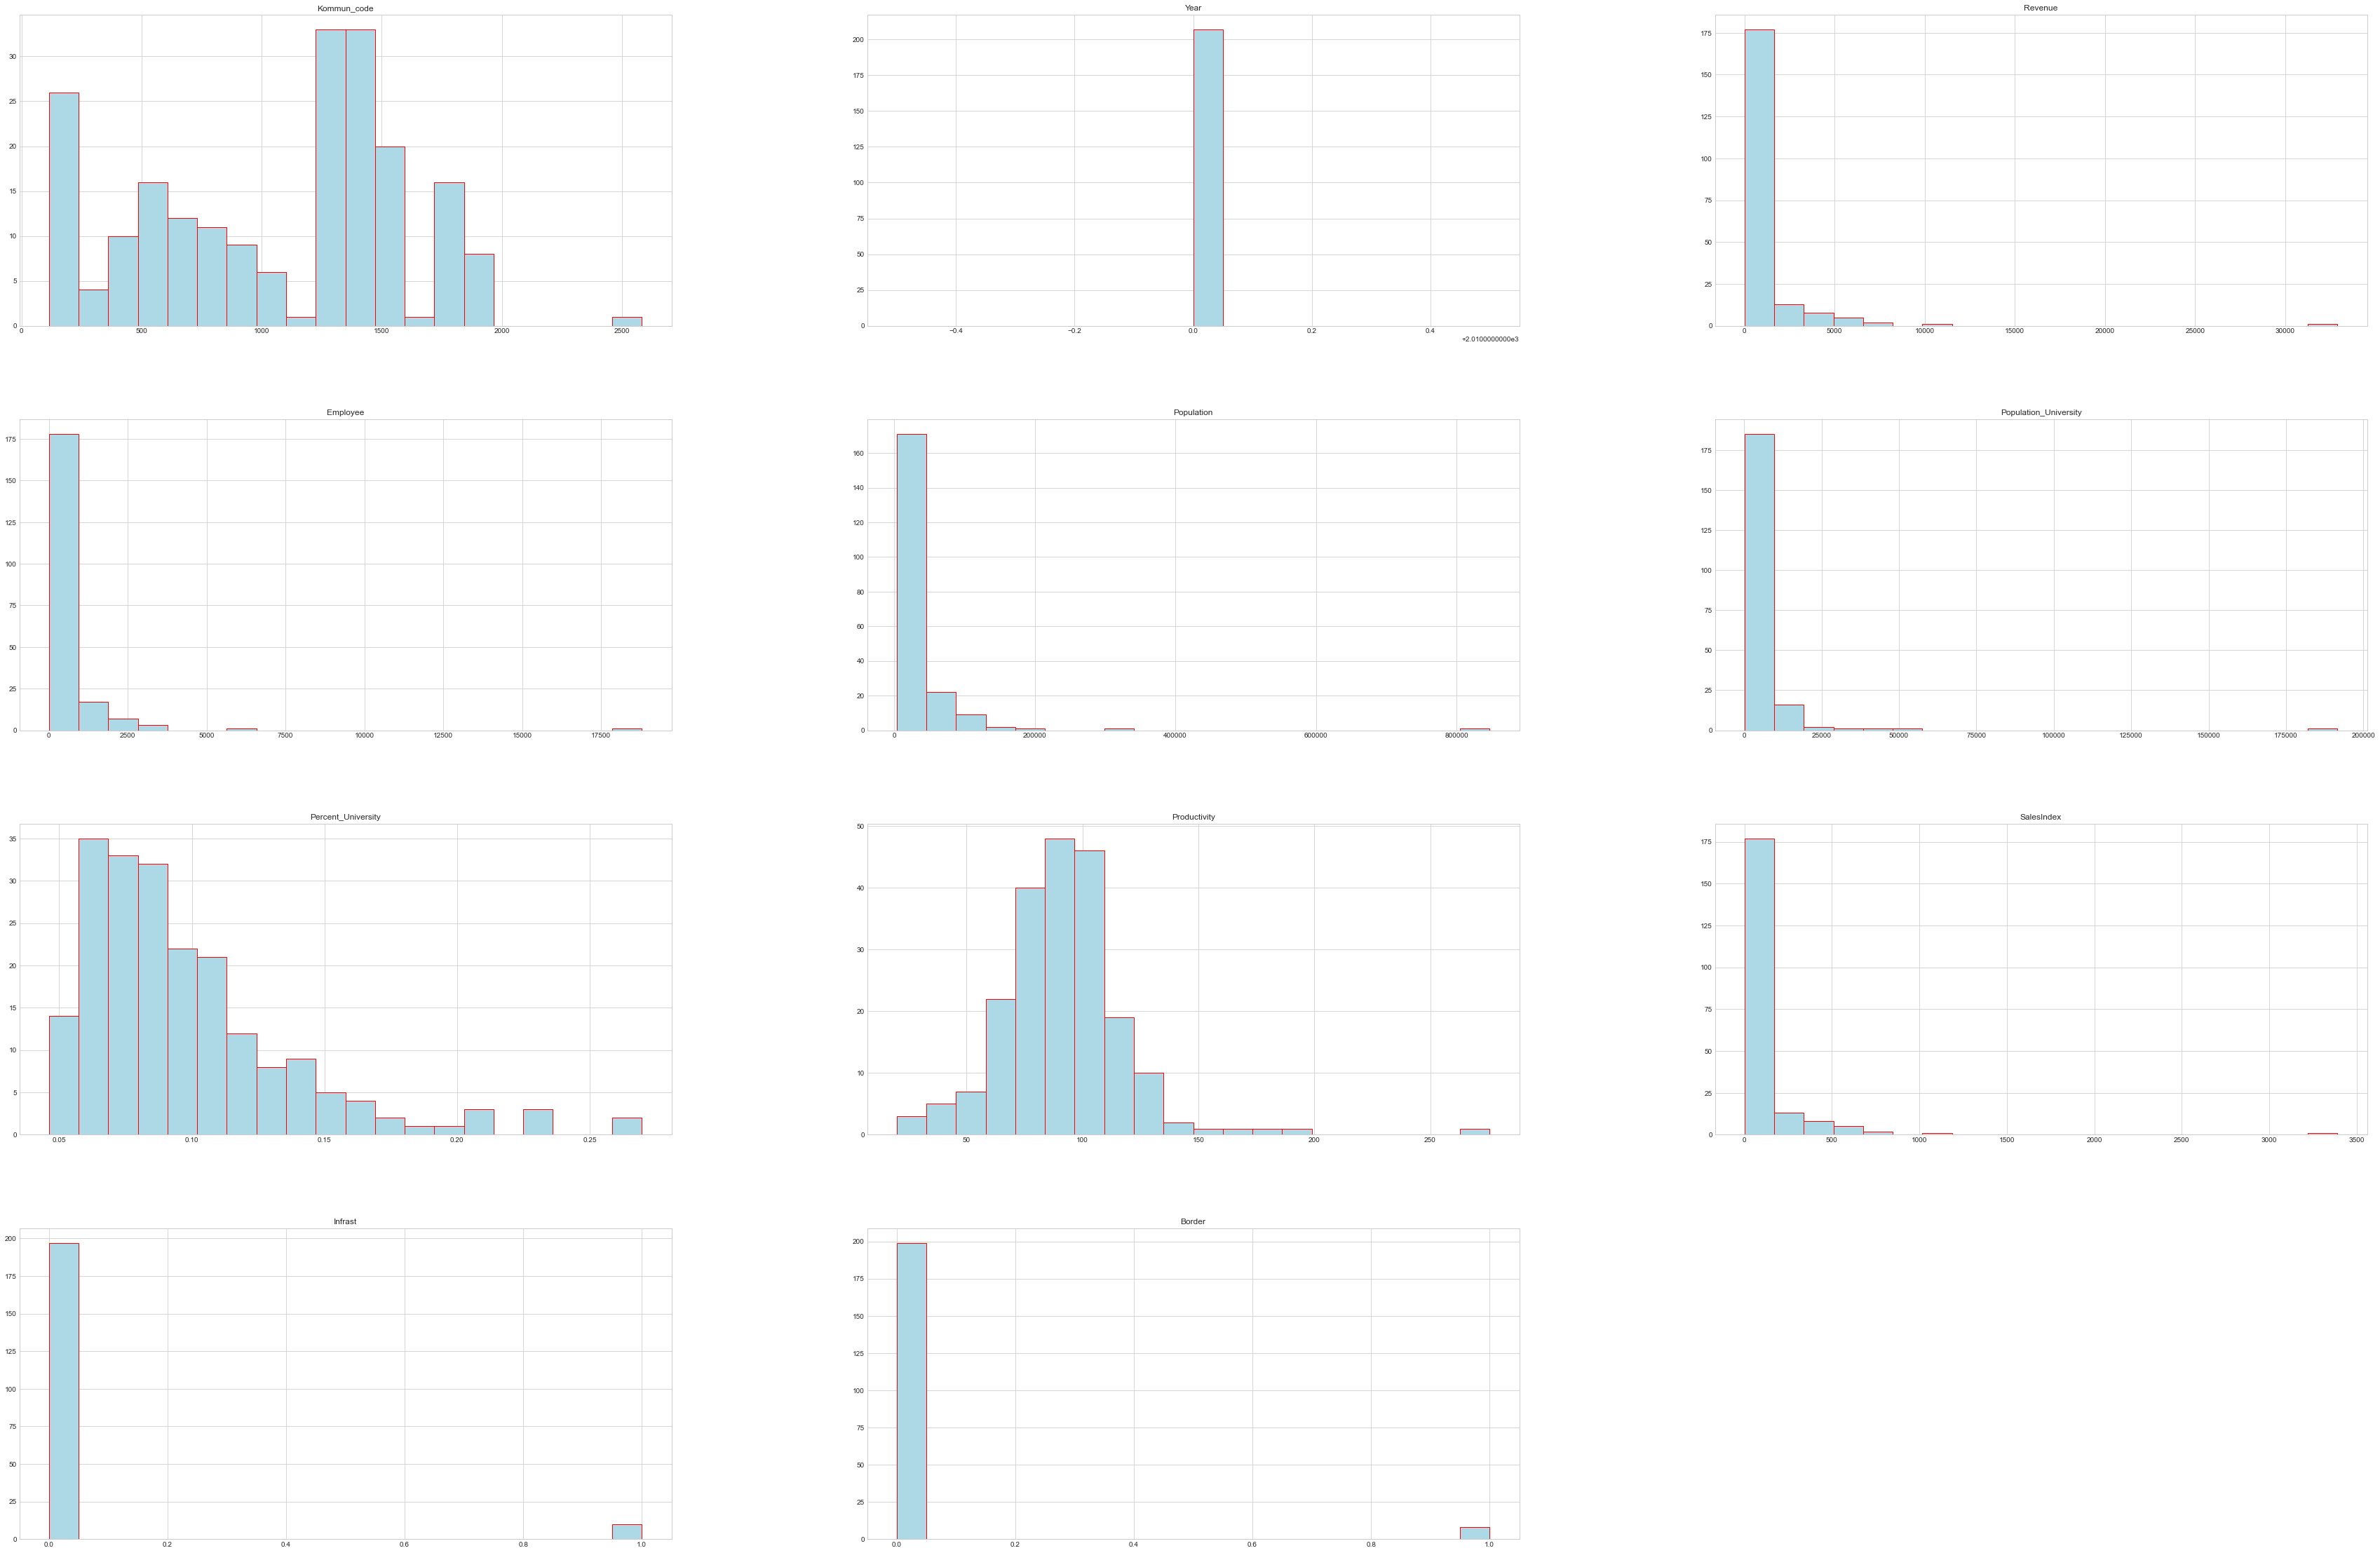

In [41]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
ikea.hist(bins=20, figsize=(60,40), color='lightblue', edgecolor = 'red')
plt.show()

By observing above descriptive statistics and the plots, we can remove 'Year', ' Infra', and 'Border' variables considering insignificant. Also, the 'Kommun_name', 'Kommun_code' can be dropped from the dataset.

In [42]:
ikea_df = ikea.drop(['Kommun_code', 'Kommun_name', 'Year', 'Infrast', 'Border'], axis = 1)

# Principal Component Analysis (PCA) 

In [43]:
import numpy as np

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [44]:
sc = StandardScaler()

# scale features
X_reduced = sc.fit_transform(ikea_df)

We’ll use Kommun_code as the response variable and the other variables as the predictors:


In [45]:
# PCA and Dimentionality Reduction
pca = PCA()
pca.fit(X_reduced)

PCA()

In [46]:
# percentage of variance in the response variable 
cev = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [47]:
print(cev)

[ 74.1   88.25  98.97  99.74  99.94 100.   100.  ]


Text(0.5, 1.0, 'Explained Variance')

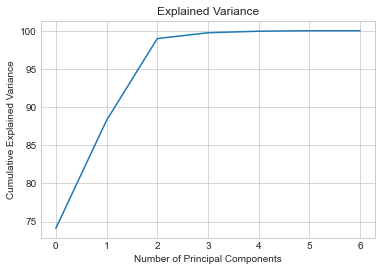

In [48]:
# Plot explained variance    
plt.plot(cev)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance')

from this plot we can see that the Cumulative Explained Variance reached 100% by adding in third principle component.

thus, the optimal model includes just the first four principle components that accomodate 90-95% of total variance.

In [49]:
# PCA with 
pca = PCA(n_components = 4)
pca.fit(X_reduced)
pca.transform(X_reduced)

array([[-2.56826775e-01,  3.79537568e+00, -3.54488101e-01,
         1.29425205e-02],
       [ 1.82213768e+00,  8.26915348e-01,  6.26856121e-01,
         6.36531962e-01],
       [ 2.54541861e+00,  8.57841419e-01,  8.74368773e-01,
         5.89332241e-01],
       [ 2.86170173e-01,  1.61893608e-01,  3.14778629e-01,
         1.15532213e-01],
       [-2.91902426e-01, -2.15088137e-01,  8.34729967e-01,
        -2.12561192e-01],
       [-2.59450475e-03, -1.07521272e-01,  7.47846689e-01,
        -1.77639541e-01],
       [ 1.42858290e-01,  3.18142269e-01,  6.43093997e-01,
        -6.26275429e-02],
       [ 2.40425439e+00,  1.22935677e+00,  4.26397148e-01,
         1.04140404e+00],
       [-2.28847440e-01, -1.12061304e+00,  1.40541905e+00,
        -1.12414640e-01],
       [ 3.51190299e+00,  2.03175427e+00,  8.61506323e-02,
         1.34159331e+00],
       [ 6.60099835e-01,  1.65446718e+00, -3.73093543e-02,
        -3.69924094e-01],
       [-6.73815182e-01, -2.56745114e+00,  6.58512520e-01,
      

In [50]:
scores =pca.transform(X_reduced)

In [51]:
# K-Means

# Elbow Method
elb =[]
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scores)
    elb.append(kmeans.inertia_)
    

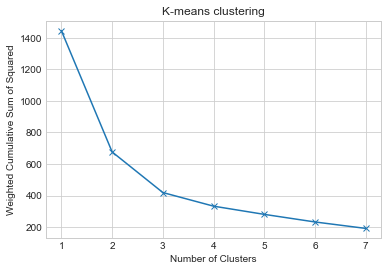

In [52]:
# Elbow plot 

plt.plot(range(1,8), elb, marker = 'x')
plt.xlabel('Number of Clusters')
plt.ylabel('Cumulative Sum of Squared')
plt.title('K-means clustering')
plt.show()

We can choose the number of as cluster = 3 

In [53]:
#re-perform with 3 clusters 
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

kmeans.fit(scores)

KMeans(n_clusters=3, random_state=42)

In [54]:
## K means clustering with Reduced dim
X_reduced_df = pd.concat([ikea.reset_index(drop = True), pd.DataFrame(scores)], axis = 1)
X_reduced_df.columns.values[-4: ] = ['PC 1', 'PC 2', 'PC 3', 'PC 4']

# Add custering label column
X_reduced_df['K-means label'] = kmeans.labels_
X_reduced_df.head()


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PC 1,PC 2,PC 3,PC 4,K-means label
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,-0.256827,3.795376,-0.354488,0.012943,0
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1.822138,0.826915,0.626856,0.636532,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2.545419,0.857841,0.874369,0.589332,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.286170,0.161894,0.314779,0.115532,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,-0.291902,-0.215088,0.834730,-0.212561,0


In [55]:
#labeling
X_reduced_df['Label'] = X_reduced_df['K-means label'].map({0:'first',1:'second',2:'third'})



/Users/Oksana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

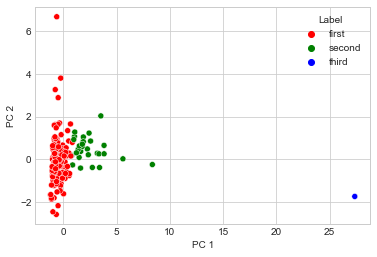

In [57]:
import seaborn as sns
sns.set

# Plot first two components and their labels
x_ax =  X_reduced_df['PC 1']
y_ax =  X_reduced_df['PC 2']

sns.scatterplot(x_ax, y_ax , hue = X_reduced_df['Label'], 
                palette = ['r','g','b'] )


/Users/Oksana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC 2', ylabel='PC 4'>

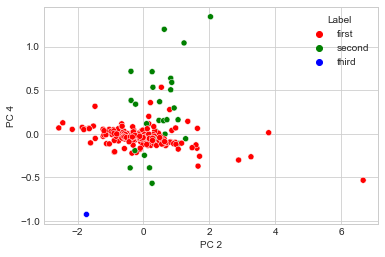

In [58]:
x_ax1 =  X_reduced_df['PC 2']
y_ax1 =  X_reduced_df['PC 4']

sns.scatterplot(x_ax1, y_ax1 , hue = X_reduced_df['Label'], 
                palette = ['r','g','b'] )

/Users/Oksana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC 1', ylabel='PC 4'>

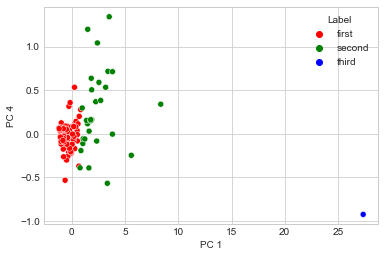

In [65]:
x_ax2 =  X_reduced_df['PC 1']
y_ax2 =  X_reduced_df['PC 4']

sns.scatterplot(x_ax2, y_ax2 , hue = X_reduced_df['Label'], 
                palette = ['r','g','b'] )

### Adding 'Has_ikea' column

In [66]:
X_reduced_df['has_ikea'] = 0

# modify the has_ikea to 1  by checking the relevant locations 
X_reduced_df.loc[(X_reduced_df["Kommun_name"] == 'Borlänge') | 
                       (X_reduced_df["Kommun_name"] == 'Gävle') |
                       (X_reduced_df["Kommun_name"] == 'Göteborg') |
                       (X_reduced_df["Kommun_name"] == 'Haparanda') |
                       (X_reduced_df["Kommun_name"] == 'Helsingborg') |
                       (X_reduced_df["Kommun_name"] == 'Jönköping') |
                       (X_reduced_df["Kommun_name"] == 'Kalmar') |
                       (X_reduced_df["Kommun_name"] == 'Karlstad') | 
                       (X_reduced_df["Kommun_name"] == 'Linköping') |
                       (X_reduced_df["Kommun_name"] == 'Malmö') |
                       (X_reduced_df["Kommun_name"] == 'Stockholm') |
                       (X_reduced_df["Kommun_name"] == 'Sundsvall') | 
                       (X_reduced_df["Kommun_name"] == 'Uddevalla') | 
                       (X_reduced_df["Kommun_name"] == 'Umeå,') |
                       (X_reduced_df["Kommun_name"] == 'Uppsala') |
                       (X_reduced_df["Kommun_name"] == 'Västerås') |
                       (X_reduced_df["Kommun_name"] == 'Älmhult') |
                       (X_reduced_df["Kommun_name"] == 'Örebro'), "has_ikea"] = 1

X_reduced_df.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PC 1,PC 2,PC 3,PC 4,K-means label,Label,has_ikea
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,-0.256827,3.795376,-0.354488,0.012943,0,first,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1.822138,0.826915,0.626856,0.636532,1,second,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,2.545419,0.857841,0.874369,0.589332,1,second,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0.286170,0.161894,0.314779,0.115532,0,first,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,-0.291902,-0.215088,0.834730,-0.212561,0,first,0


In [68]:
# revenues per cluster
r1 = X_reduced_df.loc[(X_reduced_df['Label'] == 'first') , 
                      'Revenue' ].mean()
print('Revenue: 1st cluster -', r1)

r2 = X_reduced_df.loc[(X_reduced_df['Label'] == 'second') , 
                      'Revenue' ].mean()
print('Revenue: 2nd cluster -', r2)

r3 = X_reduced_df.loc[(X_reduced_df['Label'] == 'third') , 
                      'Revenue' ].mean()
print('Revenue: 3rd cluster -', r3)


Revenue: 1st cluster - 383.8474576271187
Revenue: 2nd cluster - 3887.7586206896553
Revenue: 3rd cluster - 32897.0


In [69]:
# population per cluster
p1 = X_reduced_df.loc[(X_reduced_df['Label'] == 'first') , 
                      'Population' ].mean()
print('Population: 1st cluster -', p1)

p2 = X_reduced_df.loc[(X_reduced_df['Label'] == 'second') , 
                      'Population' ].mean()
print('Population: 2nd cluster -', p2)

p3 = X_reduced_df.loc[(X_reduced_df['Label'] == 'third') , 
                      'Population' ].mean()
print('Population: 3rd cluster -', p3)

Population: 1st cluster - 19891.514124293786
Population: 2nd cluster - 95952.13793103448
Population: 3rd cluster - 847073.0


In [72]:
# filter with kommun has no ikea
noikea_df = X_reduced_df.loc[X_reduced_df['has_ikea'] == 0, ]

# sort
noikea_df_1 = noikea_df.sort_values(["Revenue", "Population" ], ascending=False)

noikea_df_1.head(4)



,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PC 1,PC 2,PC 3,PC 4,K-means label,Label,has_ikea
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,3.511903,2.031754,0.086151,1.341593,1,second,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,2.404254,1.229357,0.426397,1.041404,1,second,0
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,2.712400,-0.375580,-0.351839,0.382849,1,second,0
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,1.492215,0.630143,-0.758354,1.197779,1,second,0


In [73]:
noikea_df_2 = noikea_df.sort_values(["Population", "SalesIndex" ], ascending=False)

noikea_df_2.head(4)



,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PC 1,PC 2,PC 3,PC 4,K-means label,Label,has_ikea
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,2.712400,-0.375580,-0.351839,0.382849,1,second,0
118,1281,2010,Lund,3438,1561,110488,29233,0.264581,110.37653,354.247229,0,0,3.336683,0.260809,3.473684,-0.566729,1,second,0
173,1490,2010,Borås,3365,1486,103294,10919,0.105708,113.48541,346.725400,0,0,1.772410,0.711329,-0.179171,0.162154,1,second,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,3.511903,2.031754,0.086151,1.341593,1,second,0


In [74]:
noikea_df_3 = noikea_df.sort_values(["Revenue", "SalesIndex" ], ascending=False)

noikea_df_3.head(4)

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,PC 1,PC 2,PC 3,PC 4,K-means label,Label,has_ikea
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,3.511903,2.031754,0.086151,1.341593,1,second,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,2.404254,1.229357,0.426397,1.041404,1,second,0
53,581,2010,Norrköping,4438,2630,130050,14526,0.111696,84.56785,457.285981,0,0,2.712400,-0.375580,-0.351839,0.382849,1,second,0
132,1382,2010,Falkenberg,4395,2035,41008,3396,0.082813,108.23513,452.855314,0,0,1.492215,0.630143,-0.758354,1.197779,1,second,0


## New Ikea store locations

Having considered the Revenue, Population, and Sales Index, I suggest that the most suitable kommuns will be,

    1. Huddinge
    2. Järfälla
    3. Norrköping